0	Задание не выполнено
1	Обучено две модели; гипепараметры подобраны при помощи одного метода
2	Обучено две модели; гипепараметры подобраны при помощи двух методов
3	Обучено две модели; гипепараметры подобраны при помощи трёх методов
4	Обучено две модели; гипепараметры подобраны при помощи четырёх методов
5	Обучено две модели; гипепараметры подобраны при помощи четырёх методов; использована кросс-валидация

In [3]:
#импорт библиотек
import numpy as np #для матричных вычислений
import pandas as pd #для анализа и предобработки данных
import matplotlib.pyplot as plt #для визуализации
import seaborn as sns #для визуализации

from sklearn import linear_model #линейные моделиё
from sklearn import tree #деревья решений
from sklearn import ensemble #ансамбли
from sklearn import metrics #метрики
from sklearn import preprocessing #предобработка
from sklearn.model_selection import train_test_split #сплитование выборки

plt.style.use('seaborn-v0_8')


In [4]:
data = pd.read_csv('_train_sem09 (1).csv')
data.head(5)

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0


Создаем матрицу наблюдений $X$ и вектор ответов $y$

In [5]:
X = data.drop(['Activity'], axis=1)
y = data['Activity']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 1, test_size = 0.2)

Зафиксируем только метрики, которые были получены без дополнительной настройки, т.е со значениями гиперпараметров, установленных по умолчанию:

In [7]:
#Создаем объект класса логистическая регрессия
log_reg = linear_model.LogisticRegression(max_iter = 1000)
#Обучаем модель, минимизируя logloss
log_reg.fit(X_train, y_train)
#print("accuracy на тестовом наборе: {:.2f}".format(log_reg.score(X_test, y_test)))
y_test_pred = log_reg.predict(X_test)
print('f1_score на тестовом наборе: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))

f1_score на тестовом наборе: 0.78


Попробуем использовать GridSearch в качестве первой модели

In [8]:
from sklearn.model_selection import GridSearchCV

param_grid = {'penalty': ['l2', 'none'] ,#тип регурялизации
              'solver': ['lbfgs', 'saga'], #алгоритм оптимизации
              }
grid_search = GridSearchCV(
    estimator=linear_model.LogisticRegression(
        random_state=42, #генератор случайных чисел
        max_iter=50 #количество итераций на сходимость
    ), 
    param_grid=param_grid, 
    cv=5, 
    n_jobs = -1
)  
%time grid_search.fit(X_train, y_train) 
#print("accuracy на тестовом наборе: {:.2f}".format(grid_search.score(X_test, y_test)))
y_test_pred = grid_search.predict(X_test)
print('f1_score на тестовом наборе: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))
print("Наилучшие значения гиперпараметров: {}".format(grid_search.best_params_))

CPU times: total: 7.06 s
Wall time: 45.9 s
f1_score на тестовом наборе: 0.78
Наилучшие значения гиперпараметров: {'penalty': 'l2', 'solver': 'saga'}


c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Grid search не дал прироста точности в сравнении с параметрами по умолчанию. F1 была и осталась 0.78


Расширим сетку параметров

In [9]:
param_grid = [
              {'penalty': ['l2', 'none'] , # тип регуляризации
              'solver': ['lbfgs', 'sag'], # алгоритм оптимизации
               'C': [0.01, 0.1, 0.3, 0.5, 0.7, 0.9, 1]}, # уровень силы регурялизации
              
              {'penalty': ['l1', 'l2'] ,
              'solver': ['liblinear', 'saga'],
               'C': [0.01, 0.1, 0.3, 0.5, 0.7, 0.9, 1]}
]
grid_search_1 = GridSearchCV(
    estimator=linear_model.LogisticRegression(random_state=1, max_iter=50), 
    param_grid=param_grid, 
    cv=5, 
    n_jobs = -1
)  
%time grid_search_1.fit(X_train, y_train) 
#print("accuracy на тестовом наборе: {:.2f}".format(grid_search_1.score(X_test, y_test)))
y_test_pred = grid_search_1.predict(X_test)
print('f1_score на тестовом наборе: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))
print("Наилучшие значения гиперпараметров: {}".format(grid_search_1.best_params_))

CPU times: total: 4.41 s
Wall time: 7min 18s
f1_score на тестовом наборе: 0.79
Наилучшие значения гиперпараметров: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}


c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Добавление параметра C дало прирост метрики f1 до 0,79

In [10]:
print("Наилучшая модель:\n{}".format(grid_search_1.best_estimator_))

Наилучшая модель:
LogisticRegression(C=0.1, max_iter=50, random_state=1)


In [11]:
print("Наилучшее значение точности при кросс-валидаци: {:.2f}".format(grid_search_1.best_score_))

Наилучшее значение точности при кросс-валидаци: 0.76


In [12]:
# Взглянем на результаты кросс-валидации
result_cv = pd.DataFrame(grid_search_1.cv_results_)
result_cv.head(2)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,2.056974,0.441107,0.080063,0.013996,0.01,l2,lbfgs,"{'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}",0.736667,0.765000,0.780000,0.745,0.746667,0.754667,0.015684,21
1,8.663344,0.799304,0.071623,0.011701,0.01,l2,sag,"{'C': 0.01, 'penalty': 'l2', 'solver': 'sag'}",0.738333,0.763333,0.781667,0.745,0.745000,0.754667,0.015861,21


In [13]:
result_cv.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_C', 'param_penalty', 'param_solver', 'params',
       'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score'],
      dtype='object')

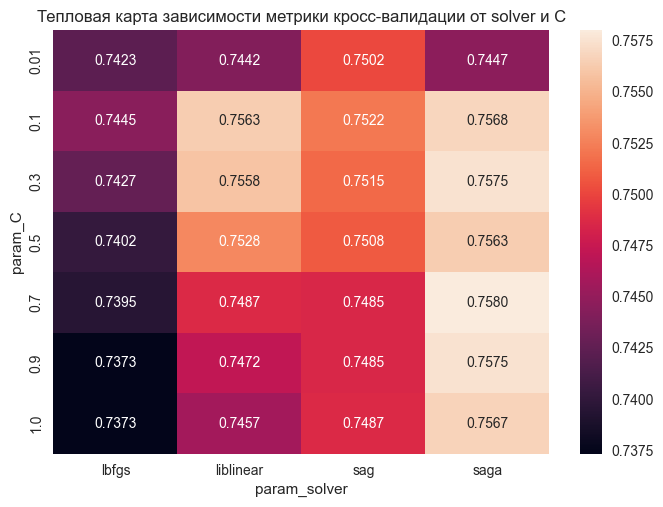

In [14]:
# отрисуем, как менялась точность при различных гиперпараметрах
visual = pd.pivot_table(pd.DataFrame(grid_search_1.cv_results_),
               values='mean_test_score', index='param_C',
               columns='param_solver')
sns.heatmap(visual,annot=True,fmt='.4f')
plt.title('Тепловая карта зависимости метрики кросс-валидации от solver и С') # подпись графика
sns.set(rc={'figure.figsize':(12, 8)}) #задаем размер графика

Попробуем использовать RandomSearch

In [15]:
from sklearn.model_selection import RandomizedSearchCV


param_distributions = {'penalty': ['l2', 'none'] ,
              'solver': ['lbfgs', 'sag'],
               'C': list(np.linspace(0.01, 1, 10, dtype=float))},
            
random_search = RandomizedSearchCV(
    estimator=linear_model.LogisticRegression(random_state=42, max_iter=50), 
    param_distributions=param_distributions, 
    cv=5, 
    n_iter = 10, 
    n_jobs = -1
)  
%time random_search.fit(X_train, y_train) 
#print("accuracy на тестовом наборе: {:.2f}".format(random_search.score(X_test, y_test)))
y_test_pred = random_search.predict(X_test)
print('f1_score на тестовом наборе: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))
print("Наилучшие значения гиперпараметров: {}".format(random_search.best_params_))

CPU times: total: 2.08 s
Wall time: 1min 19s
f1_score на тестовом наборе: 0.79
Наилучшие значения гиперпараметров: {'solver': 'lbfgs', 'penalty': 'l2', 'C': 0.12}


c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


F1 на тестовом наборе получилась 0,79. Увеличения метрики нет по сравнению с GreadSearch на расширенных параметрах.

Попробуем использовать GridSearch И RandomSearch для для случайного леса

In [16]:
#Создаем объект класса случайный лес
rf = ensemble.RandomForestClassifier(random_state=42)

#Обучаем модель
rf.fit(X_train, y_train)
#Выводим значения метрики 
y_train_pred = rf.predict(X_train)
print('Train: {:.2f}'.format(metrics.f1_score(y_train, y_train_pred)))
y_test_pred = rf.predict(X_test)
print('Test: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))

Train: 1.00
Test: 0.81


При параметрах по умолчанию F1 на тренировочной выборке равно 1 на тестовой 0.81

Создадим сетку параметров для случайного леса.

Используем для начала RandomSearch

In [17]:
param_distributions = {'n_estimators': list(range(80, 200, 30)),
              'min_samples_leaf': [5],
              'max_depth': list(np.linspace(20, 40, 10, dtype=int))
              }
            
random_search_forest = RandomizedSearchCV(
    estimator=ensemble.RandomForestClassifier(random_state=42), 
    param_distributions=param_distributions, 
    cv=5,
    n_iter = 10, 
    n_jobs = -1
)  
%time random_search_forest.fit(X_train, y_train) 
y_train_pred = random_search_forest.predict(X_train)
print('f1_score на обучающем наборе: {:.2f}'.format(metrics.f1_score(y_train, y_train_pred)))
#print("accuracy на тестовом наборе: {:.2f}".format(random_search_forest.score(X_test, y_test)))
y_test_pred = random_search_forest.predict(X_test)
print('f1_score на тестовом наборе: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))
print("Наилучшие значения гиперпараметров: {}".format(random_search_forest.best_params_))

CPU times: total: 3.61 s
Wall time: 1min 25s
f1_score на обучающем наборе: 0.94
f1_score на тестовом наборе: 0.82
Наилучшие значения гиперпараметров: {'n_estimators': 80, 'min_samples_leaf': 5, 'max_depth': 35}


При применении RandomSearch F1 на тестовой выборке стало равно  0.82. Метрику удалось  улучшить.

Теперь попробуем применить GridSearch для леса.

In [18]:
param_grid = {'n_estimators': list(range(80, 200, 30)),
              'min_samples_leaf': [5],
              'max_depth': list(np.linspace(20, 40, 5, dtype=int))
              }
            
grid_search_forest = GridSearchCV(
    estimator=ensemble.RandomForestClassifier(random_state=42), 
    param_grid=param_grid, 
    cv=5, 
    n_jobs = -1
)  
%time grid_search_forest.fit(X_train, y_train) 
y_train_pred = grid_search_forest.predict(X_train)
print('f1_score на обучающем наборе: {:.2f}'.format(metrics.f1_score(y_train, y_train_pred)))
#print("accuracy на тестовом наборе: {:.2f}".format(grid_search_forest.score(X_test, y_test)))
y_test_pred = grid_search_forest.predict(X_test)
print('f1_score на тестовом наборе: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))
print("Наилучшие значения гиперпараметров: {}".format(grid_search_forest.best_params_))

CPU times: total: 6.39 s
Wall time: 2min 57s
f1_score на обучающем наборе: 0.94
f1_score на тестовом наборе: 0.82
Наилучшие значения гиперпараметров: {'max_depth': 20, 'min_samples_leaf': 5, 'n_estimators': 140}


При применении GridSearch F1 на тестовой выборке стало равно  0.82. Метрику удалось  улучшить до уровня метрики на RandomSearch. Но на RandomSearch затраченное время чуть меньше.

Попробуем оптимизацию Hyperopt

In [19]:
#делаем импорт и выведем версию библиотеки
from sklearn.model_selection import cross_val_score
import hyperopt
from hyperopt import hp, fmin, tpe, Trials
# fmin - основная функция, она будет минимизировать наш функционал
# tpe - алгоритм оптимизации
# hp - включает набор методов для объявления пространства поиска гиперпараметров
# trails - используется для логирования результатов

print("Версия Hyperopt : {}".format(hyperopt.__version__))

Версия Hyperopt : 0.2.7


In [20]:
space={'n_estimators': hp.quniform('n_estimators', 100, 200, 1),
       'max_depth' : hp.quniform('max_depth', 15, 26, 1),
       'min_samples_leaf': hp.quniform('min_samples_leaf', 2, 10, 1)
      }

Попробуем использовать модель леса(1ая модель для hyperopt)

In [21]:
# зафксируем random_state
random_state = 42
def hyperopt_rf(params, cv=5, X=X_train, y=y_train, random_state=random_state):
    # функция получает комбинацию гиперпараметров в "params"
    params = {'n_estimators': int(params['n_estimators']), 
              'max_depth': int(params['max_depth']), 
             'min_samples_leaf': int(params['min_samples_leaf'])
              }
  
    # используем эту комбинацию для построения модели
    model = ensemble.RandomForestClassifier(**params, random_state=random_state)

    # обучаем модель
    model.fit(X, y)
    #score = metrics.f1_score(y, model.predict(X))
    
    # обучать модель можно также с помощью кросс-валидации
    # применим  cross validation с тем же количеством фолдов так как в задании было сказано использоват кросс-валидацию
    score = cross_val_score(model, X, y, cv=cv, scoring="f1", n_jobs=-1).mean()

    # метрику необходимо минимизировать, поэтому ставим знак минус
    return -score


In [22]:
%%time
# начинаем подбор гиперпараметров

trials = Trials() # используется для логирования результатов

best=fmin(hyperopt_rf, # наша функция 
          space=space, # пространство гиперпараметров
          algo=tpe.suggest, # алгоритм оптимизации, установлен по умолчанию, задавать необязательно
          max_evals=20, # максимальное количество итераций
          trials=trials, # логирование результатов
          rstate=np.random.default_rng(random_state)# фиксируем для повторяемости результата
         )
print("Наилучшие значения гиперпараметров {}".format(best))


  0%|          | 0/20 [00:00<?, ?trial/s, best loss=?]

100%|██████████| 20/20 [06:00<00:00, 18.01s/trial, best loss: -0.8080577050312506]
Наилучшие значения гиперпараметров {'max_depth': 18.0, 'min_samples_leaf': 2.0, 'n_estimators': 103.0}
CPU times: total: 1min 47s
Wall time: 6min


Полученный результат:
Наилучшие значения гиперпараметров {'max_depth': 18.0, 'min_samples_leaf': 2.0, 'n_estimators': 103.0}
CPU times: total: 2min 4s
Wall time: 7min 31s

In [23]:
# рассчитаем точность для тестовой выборки
model = ensemble.RandomForestClassifier(
    random_state=random_state, 
    n_estimators=int(best['n_estimators']),
    max_depth=int(best['max_depth']),
    min_samples_leaf=int(best['min_samples_leaf'])
)
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
print('f1_score на обучающем наборе: {:.2f}'.format(metrics.f1_score(y_train, y_train_pred)))
#print("accuracy на тестовом наборе: {:.2f}".format(model.score(X_test, y_test)))
y_test_pred = model.predict(X_test)
print('f1_score на тестовом наборе: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))

f1_score на обучающем наборе: 0.99
f1_score на тестовом наборе: 0.82


F1 не тестовом наборе улучшиллся до 0.82, что выше значений F1 на RandomizedSearch и CVSearch

Попробуем логистическую регрессию для hyperopt(2я модель для Hyperopt)

In [30]:
pen = ['l1', 'l2']
sol = ['liblinear', 'saga']
    
space_lr={'penalty':hp.choice(label='penalty', options=['l1','l2']),
          'solver':hp.choice(label='solver', options=['liblinear', 'saga']),
           'C': hp.uniform('C', 0.1, 1)}

In [31]:
#Модифицируем функцию под логистическую регрессию
random_state = 42
def hyperopt_lr(params, cv=5, X=X_train, y=y_train, random_state=random_state):
    # функция получает комбинацию гиперпараметров в "params"

    
    params = {'penalty': params['penalty'], 
              'solver': params['solver'], 
              'C': float(params['C'])
              }
  
    # используем эту комбинацию для построения модели
    model = linear_model.LogisticRegression(**params,random_state=random_state)
  

    # обучаем модель
    model.fit(X, y)
    #score = metrics.f1_score(y, model.predict(X))
    
    # обучать модель можно также с помощью кросс-валидации
    # применим  cross validation с тем же количеством фолдов так как в задании было сказано использоват кросс-валидацию
    score = cross_val_score(model, X, y, cv=cv, scoring="f1", n_jobs=-1).mean()

    # метрику необходимо минимизировать, поэтому ставим знак минус
    return -score

In [32]:
%%time
# начинаем подбор гиперпараметров

trials = Trials() # используется для логирования результатов

best=fmin(hyperopt_lr, # наша функция 
          space=space_lr, # пространство гиперпараметров
          algo=tpe.suggest, # алгоритм оптимизации, установлен по умолчанию, задавать необязательно
          max_evals=20, # максимальное количество итераций
          trials=trials, # логирование результатов
          rstate=np.random.default_rng(random_state)# фиксируем для повторяемости результата
         )
print("Наилучшие значения гиперпараметров {}".format(best))

  0%|          | 0/20 [00:00<?, ?trial/s, best loss=?]

  5%|▌         | 1/20 [00:09<02:56,  9.27s/trial, best loss: -0.7708552573064174]

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 15%|█▌        | 3/20 [01:19<07:02, 24.85s/trial, best loss: -0.7832526734592273]

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 25%|██▌       | 5/20 [02:26<06:45, 27.05s/trial, best loss: -0.7832526734592273]

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 30%|███       | 6/20 [03:18<08:15, 35.41s/trial, best loss: -0.7832526734592273]

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 45%|████▌     | 9/20 [04:23<04:09, 22.70s/trial, best loss: -0.7832526734592273]

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 55%|█████▌    | 11/20 [05:29<03:48, 25.35s/trial, best loss: -0.7832526734592273]

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 65%|██████▌   | 13/20 [06:24<02:51, 24.53s/trial, best loss: -0.7832526734592273]

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 70%|███████   | 14/20 [07:23<03:30, 35.10s/trial, best loss: -0.7832526734592273]

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 80%|████████  | 16/20 [08:40<02:15, 33.78s/trial, best loss: -0.7832526734592273]

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 85%|████████▌ | 17/20 [09:27<01:53, 37.70s/trial, best loss: -0.7832526734592273]

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 90%|█████████ | 18/20 [10:25<01:27, 43.63s/trial, best loss: -0.7832526734592273]

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



100%|██████████| 20/20 [11:38<00:00, 34.91s/trial, best loss: -0.7832526734592273]
Наилучшие значения гиперпараметров {'C': 0.1662949229054717, 'penalty': 0, 'solver': 0}
CPU times: total: 3min 29s
Wall time: 11min 38s


Запишем  получившиеся значения:
Наилучшие значения гиперпараметров {'C': 0.1662949229054717, 'penalty': 0, 'solver': 0}
CPU times: total: 3min 29s
Wall time: 11min 38s

Расчитаем метрику f1 для Hyperopt/logisticregression

In [50]:
model = linear_model.LogisticRegression(
    random_state=random_state, 
    penalty='l1',
    solver='liblinear',
    C=0.1662949229054717
)

model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
print('f1_score на обучающем наборе: {:.2f}'.format(metrics.f1_score(y_train, y_train_pred)))
#print("accuracy на тестовом наборе: {:.2f}".format(model.score(X_test, y_test)))
y_test_pred = model.predict(X_test)
print('f1_score на тестовом наборе: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))

f1_score на обучающем наборе: 0.81
f1_score на тестовом наборе: 0.78


Логистическая регрессия дала результат на тестовой выборке по f1 ниже чем случайный лес в сочетании c hyperopt.(0.78 vs 0.82)

Попробуем оптимизацию с Optuna

In [33]:
import optuna

print("Версия Optuna: {}".format(optuna.__version__))

Версия Optuna: 3.2.0


c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Попробуем случайный лес с Optuna

In [75]:
def optuna_rf(trial):
  # задаем пространства поиска гиперпараметров
  n_estimators = trial.suggest_int('n_estimators', 100, 200, 1)
  max_depth = trial.suggest_int('max_depth', 10, 30, 1)
  min_samples_leaf = trial.suggest_int('min_samples_leaf', 2, 10, 1)

  # создаем модель
  model = ensemble.RandomForestClassifier(n_estimators=n_estimators,
                                          max_depth=max_depth,
                                          min_samples_leaf=min_samples_leaf,
                                          random_state=random_state)
  # обучаем модель
  model.fit(X_train, y_train)
  #score = metrics.f1_score(y_train, model.predict(X_train))
  score = cross_val_score(model, X, y, cv=5, scoring="f1", n_jobs=-1).mean()
  return score

In [35]:
%%time
# cоздаем объект исследования
# указываем нанапрямую, что нам необходимо максимизировать метрику direction="maximize"
study = optuna.create_study(study_name="RandomForestClassifier", direction="maximize")
# ищем лучшую комбинацию гиперпараметров n_trials раз
study.optimize(optuna_rf, n_trials=20)

[I 2023-07-13 14:12:25,951] A new study created in memory with name: RandomForestClassifier
[I 2023-07-13 14:13:13,860] Trial 0 finished with value: 0.8024426917160108 and parameters: {'n_estimators': 150, 'max_depth': 30, 'min_samples_leaf': 6}. Best is trial 0 with value: 0.8024426917160108.
[I 2023-07-13 14:13:35,827] Trial 1 finished with value: 0.801016792824603 and parameters: {'n_estimators': 158, 'max_depth': 25, 'min_samples_leaf': 8}. Best is trial 0 with value: 0.8024426917160108.
[I 2023-07-13 14:13:51,850] Trial 2 finished with value: 0.7972135591625669 and parameters: {'n_estimators': 121, 'max_depth': 14, 'min_samples_leaf': 9}. Best is trial 0 with value: 0.8024426917160108.
[I 2023-07-13 14:14:08,493] Trial 3 finished with value: 0.8063794310129436 and parameters: {'n_estimators': 108, 'max_depth': 11, 'min_samples_leaf': 2}. Best is trial 3 with value: 0.8063794310129436.
[I 2023-07-13 14:14:27,430] Trial 4 finished with value: 0.8000460169336108 and parameters: {'n_e

CPU times: total: 2min 20s
Wall time: 9min 2s


In [36]:
# выводим результаты на обучающей выборке
print("Наилучшие значения гиперпараметров {}".format(study.best_params))
print("f1_score на обучающем наборе: {:.2f}".format(study.best_value))

Наилучшие значения гиперпараметров {'n_estimators': 184, 'max_depth': 28, 'min_samples_leaf': 2}
f1_score на обучающем наборе: 0.82


In [38]:
# рассчитаем точность для тестовой выборки
model = ensemble.RandomForestClassifier(**study.best_params,random_state=random_state, )
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
#print("accuracy на тестовом наборе: {:.2f}".format(model.score(X_test, y_test)))
y_test_pred = model.predict(X_test)
print('f1_score на тестовом наборе: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))

f1_score на тестовом наборе: 0.82


In [39]:
%%time
# можем прододжить подбор, указав n_trials(любое число, которое добавится к предыдущим итерациям) 
study.optimize(optuna_rf, n_trials=10)

[I 2023-07-13 14:30:28,827] Trial 20 finished with value: 0.815342128147264 and parameters: {'n_estimators': 187, 'max_depth': 28, 'min_samples_leaf': 2}. Best is trial 19 with value: 0.8155044531311979.
[I 2023-07-13 14:31:01,737] Trial 21 finished with value: 0.815342128147264 and parameters: {'n_estimators': 187, 'max_depth': 28, 'min_samples_leaf': 2}. Best is trial 19 with value: 0.8155044531311979.
[I 2023-07-13 14:31:37,512] Trial 22 finished with value: 0.8149564449359026 and parameters: {'n_estimators': 189, 'max_depth': 28, 'min_samples_leaf': 2}. Best is trial 19 with value: 0.8155044531311979.
[I 2023-07-13 14:32:05,664] Trial 23 finished with value: 0.793718263144372 and parameters: {'n_estimators': 200, 'max_depth': 28, 'min_samples_leaf': 10}. Best is trial 19 with value: 0.8155044531311979.
[I 2023-07-13 14:32:37,793] Trial 24 finished with value: 0.8107403615618877 and parameters: {'n_estimators': 186, 'max_depth': 28, 'min_samples_leaf': 3}. Best is trial 19 with valu

CPU times: total: 1min 14s
Wall time: 4min 56s


Попробуем logistic regression с Optuna

In [96]:
def optuna_lr(trial):
  # задаем пространства поиска гиперпараметров
  #params = {'penalty': params['penalty'], 
   #           'solver': params['solver'], 
    #          'C': float(params['C'])
     #         }
  

  penalty_p=trial.suggest_categorical('penalty',['l1','l2']),
  solver_p=trial.suggest_categorical('solver',['liblinear','saga']),
  C_p=trial.suggest_float('C', 0.1, 1)
  
  # создаем модель
 
  model = linear_model.LogisticRegression(penalty=penalty_p[0],solver=solver_p[0],C=C_p,random_state=random_state)
  # обучаем модель
  model.fit(X_train, y_train)
  #score = metrics.f1_score(y_train, model.predict(X_train))
  score = cross_val_score(model, X, y, cv=5, scoring="f1", n_jobs=-1).mean()
  return score

In [98]:
%%time
# cоздаем объект исследования
# указываем нанапрямую, что нам необходимо максимизировать метрику direction="maximize"
study = optuna.create_study(study_name="LogisticRegression", direction="maximize")
# ищем лучшую комбинацию гиперпараметров n_trials раз
study.optimize(optuna_lr, n_trials=20)

[I 2023-07-13 16:52:03,956] A new study created in memory with name: LogisticRegression
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[I 2023-07-13 16:53:22,438] Trial 0 finished with value: 0.7813676219046294 and parameters: {'penalty': 'l1', 'solver': 'saga', 'C': 0.9858505885498149}. Best is trial 0 with value: 0.7813676219046294.
[I 2023-07-13 16:53:27,263] Trial 1 finished with value: 0.7807058107727027 and parameters: {'penalty': 'l2', 'solver': 'liblinear', 'C': 0.17391940415306606}. Best is trial 0 with value: 0.7813676219046294.
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[I 2023-07-13 16:54:36,041] Trial 2 finished with value: 0.787088372150969 and parameter

CPU times: total: 4min 41s
Wall time: 18min 21s


In [101]:
# выводим результаты на обучающей выборке
print("Наилучшие значения гиперпараметров {}".format(study.best_params))
print("f1_score на обучающем наборе: {:.2f}".format(study.best_value))

Наилучшие значения гиперпараметров {'penalty': 'l1', 'solver': 'saga', 'C': 0.19473817722979878}
f1_score на обучающем наборе: 0.79


In [100]:
# рассчитаем точность для тестовой выборки
model = linear_model.LogisticRegression(**study.best_params,random_state=random_state, )
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
#print("accuracy на тестовом наборе: {:.2f}".format(model.score(X_test, y_test)))
y_test_pred = model.predict(X_test)
print('f1_score на тестовом наборе: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))

f1_score на тестовом наборе: 0.79


c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Вывод по использованию Optuna:Логистическая регрессия сумела оптмизировать f1 до 0,79 при использовании леса решений f1 достигло значения 0,82.

Затраты времени по моделям начиная с конца ноутбука 18,9,11,6.

Вывод по работе в целом: Все модели умеют оптимизировать гиперпараметры. В моем случае лучше всех показала себя модель Hyperopt с использованием модели Леса Решений.Такое сочетание довело метрику f1 до 0.82 за 6 минут(самый быстрый результат).